# Project for Submission

# Google play store - App Rating Prediction Analysis

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

Domain: General

Analysis to be done: 
The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

In [ ]:
 Dataset: Google Play Store data (“googleplaystore.csv”)

In [107]:
import warnings
warnings.filterwarnings('ignore')

# 1. Importing libraries and loading data

In [108]:
## importing pandas. It is usually imported with an alias "pd" (shorthand for pandas) for ease of operation.
#import pandas
import pandas as pd 

In [109]:
## importing numpy. It is usually imported with an alias "np" (shorthand for numpy) for ease of operation.
#import numpy
import numpy as np

In [110]:
## loading data (present in the current working directory using data "file name").....
# 1. loading the data file using pandas "pd.read_csv" method , assigning it to adataframe "df"....

df = pd.read_csv('googleplaystore.csv')

In [111]:
## Calling the first 5 rows using "df.head()" method, we can call desired no of rows by... "df.head(n)"
# print("The first 5 rows of the dataframe") 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [112]:
## Checking the number of rows and columns present in the dataframe by...... "df.shape" method
df.shape

(10841, 13)

# 2. checking  Null values

In [113]:
# 2.Checking for null values in the data. Getting the number of null values for each column by....  "df.isna().sum()" method.
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#A total of 1487 null values are detected.

# 3.Dropping Null values

In [114]:
# 3.Dropping the records with nulls in any of the columns by ....  "df.dropna()" method

print ('Actual number of rows before dropping null values is ',df.shape)

df = df.dropna()

print ('Number of rows after dropping null values is ',df.shape )

Actual number of rows before dropping null values is  (10841, 13)
Number of rows after dropping null values is  (9360, 13)


In [115]:
# Crosschecking if all null values dropped by... "df.isna().sum()"  .....sum of nulls = 0

df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
#Now sum of nulls == 0 ,all the null values dropped

# 4. Formatting the incorrect and inconsistent variables...

In [ ]:
# 4. Formatting the incorrect and inconsistent variables...

In [116]:
## looing at the columns present in the data by ...  "df.columns"  method....
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [117]:
## Checking the dataype of all the columns by.......   "df.dtypes" method..
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 4.1  Size

In [ ]:
#4.1. Size column has sizes in Kb as well as Mb. To analyze, we’ll need to convert these to numeric.
#Extracting the numeric value from the column.....

In [118]:
## Replacing 'M','k'(for mb,kb) with "000"&'' respectively in"Size" column by ... " df.col.str.replace()" method

df['Size'] = df.Size.str.replace("M","000") # All size values became the kilobyte type.
df['Size'] = df.Size.str.replace("k","")


## replacing "varies with device" to "Nan" in "Size" column by....." df.col.str.replace()" method
df['Size'] = df.Size.replace('Varies with device',np.nan)

In [119]:
## Replacing ''1000+'' with "1000" in"Size" column by ... " df.col.replace()" method.

df['Size'] = df.Size.replace('1000+',1000)

## changing the datatype of "Size" column to "float" by ....." df.astype()" method.
df['Size'] = df['Size'].astype(float)


In [120]:
## Crosschecking the change in datatype...... it...s a "float" now...
df['Size'].dtype

dtype('float64')

# 4.2 Reviews

In [ ]:
#4.2. 'Reviews' is a numeric field, loaded "object" datatype. Converting it to numeric "int"by.... "df.astype(int)" method ..

In [121]:
## checking the datatype of "Reviews" column...
df['Reviews'].dtype

dtype('O')

In [122]:
## changing the datatype of "Reviews" column to "float" by ....." df.astype()" method.

df['Reviews'] = df['Reviews'].astype('int')

In [123]:
## cross checking the change in datatype..
df['Reviews'].dtype

dtype('int32')

# 4.3 Installs

In [ ]:
#4.3. Installs field is currently stored as string and has values like 1,000,000+ ,Treat 1,000,000+ as 1,000,000
#remove ‘+’, ‘,’ from the field,by.... "df." convert it to integer by

In [124]:
## checking all the unique values present in column "Installs"

df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [125]:
## importing re...
import re

## Removing '+',',' from "Installs"... thereafter removing th white space... 

df['Installs'] = df['Installs'].str.replace('+','', regex = True)
df['Installs'] = df['Installs'].str.replace(',','', regex = True)
df['Installs'] = df['Installs'].str.replace(' ','', regex = True)

In [126]:
## Changing the datatype of "Installs" to "int" by...... "df.astype()"...
df['Installs'] = df['Installs'].astype('int')

In [127]:
## Crosschecking....
df['Installs'].dtype

dtype('int32')

# 4.4 Price

In [128]:
## 4.4. Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
# REmoving $ sign from "Price" column ...

df['Price'] = df['Price'].str.replace('$','', regex = True)

# changing data type to "float"
df['Price'] = df['Price'].astype('float')

In [129]:
## Crosschecking...
df['Price'].dtype

dtype('float64')

# 4.5  Sanity checks:

# (a) Rating

In [ ]:
## (a) Average rating should be between 1 and 5 as only these values are allowed on the play store. 
##Drop the rows that have a value outside this range.

In [130]:
## Checking if any "Rating" value is above the max range "5"..
df.loc[ (df['Rating'] > 5)]
df.loc[ (df['Rating'] < 1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [131]:
## conversely we can also check by printing all the values available for "Rating" column

In [132]:
## checking all the unique values present in column "Rating"

df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [27]:
##Thus we conclude: 
#1. All the values in th column "Rating"  are within the range "1" and "5".
#2. No need to drop any rows on this pretext.

# (b) Reviews

In [ ]:
##(b)Reviews should not be more than installs as only those who installed can review the app. 
#If there are any such records, drop them.

In [133]:
## filtering and dropping any rows where entries are present for "Reviews" but not for "Installs" 
print('The number of rows before fitering is ',df.shape)

rows = df[df.Installs < df.Reviews].index
df.drop(rows, axis = 0, inplace = True)

print('The number of rows after filtering and dropping entries of reviews greater than Installs is ',df.shape)

The number of rows before fitering is  (9360, 13)
The number of rows after filtering and dropping entries of reviews greater than Installs is  (9353, 13)


In [ ]:
# Decrement of rows indicates filtering of rows, thus data successfully fitered.

# (c) Type

In [ ]:
##(c) For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [134]:
# checking if for any free apps ( "Type" =  "free"), "Price" is greater than "0".. 

df.loc[ (df['Type'] == 'free') & (df['Price'] != '0')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [135]:
## conversing we can also Crosscheck by assingnig codition to variable "b" and generating a boolean output... 
b = (df['Type'] == 'free') & (df['Price'] != '0')

b.value_counts()

False    9353
dtype: int64

In [ ]:
#No such entries found where price is greater than 0 for free apps( type = free)

# 5. Performing Univariate analysis

# 5.1 Boxplot for Price.

In [ ]:
## 5.1 Boxplot for Price..Are there any outliers? Think about the price of usual apps on Play Store.

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

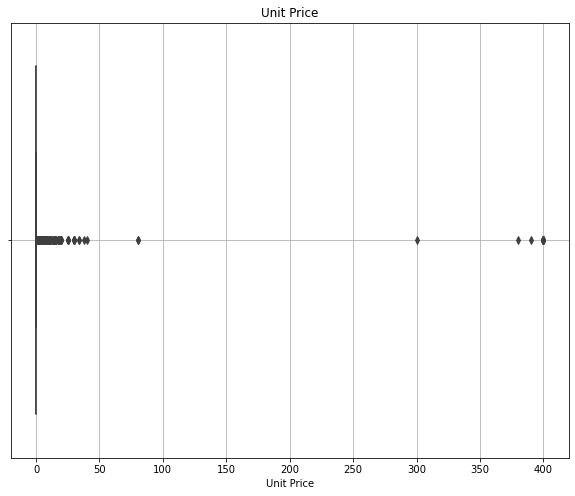

In [32]:
## plotting a boxplot for "price"
plt.subplots(figsize=(10,8))
sns.boxplot(df.Price)
plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

In [ ]:
#Yes, there are few apps with price more than 200 which need to be handled

#  5.2. Boxplot for Reviews.

In [ ]:
## 5.2. Boxplot for Reviews

# Are there any apps with very high number of reviews? Do the values seem right?



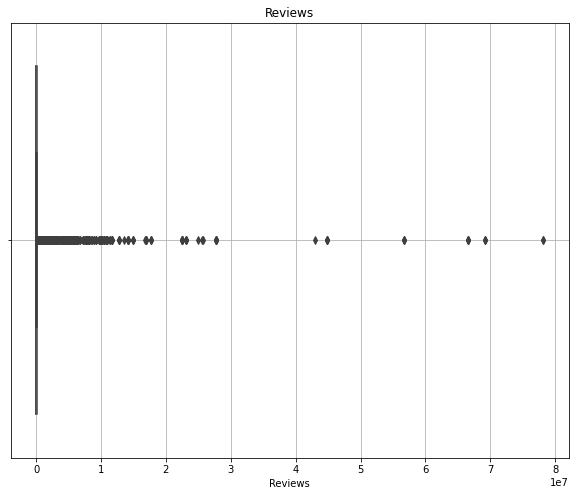

In [33]:
## plotting a boxplot for "Reviews"
plt.subplots(figsize=(10,8))
sns.boxplot(df.Reviews)
plt.xlabel('Reviews')
plt.title('Reviews')
plt.grid(linestyle='-')
plt.show()

In [ ]:
#Yes, some apps have exorbitant number of "Reviews" , which need to be handled.

# 5.3 Histogram for Rating

In [ ]:
## 5.3 Histogram for Rating
#How are the ratings distributed? Is it more toward higher ratings?

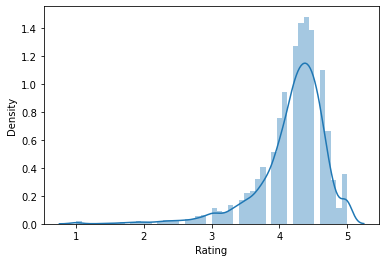

In [34]:
sns.distplot(df['Rating'])
plt.show()

In [ ]:
#The distribution is found to be "Left skewed" or "-ve'ly skewed", however no ratings above "5" detected.

# 5.4. Histogram for Size

In [ ]:
## 5.4. Histogram for Size
#Note down your observations for the plots made above. Which of these seem to have outliers?

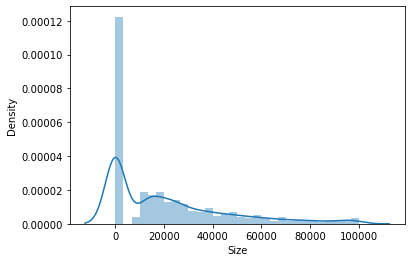

In [35]:
## plotting a histogram for size
sns.distplot(df['Size'])
plt.show()

In [ ]:
#The distribution  is found to be  "Right skewed" or "+ve'ly skewed"

# 6. Outliers treatment.

# 6.1 Price

In [ ]:
##6. Outlier treatment: 

In [ ]:
##6.1. Price: From the box plot, it seems like there are some apps with very high price. 
#A price of $200 for an application on the Play Store is very high and suspicious!
#Check out the records with very high price
#Is 200 indeed a high price?

In [137]:
#checking for distinct values of 'price'
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [ ]:
#yes,there seem to be prices more than 200 which are very high lets drop them...

In [138]:
## filtering (dropping) the rows with 'price' above 200 dollars
print('The number of rows before filtering is',df.shape)

df = df[(df['Price'] < 200)]

print('The number of rows after filtering "price"above 200 dollars is',df.shape)

The number of rows before filtering is (9353, 13)
The number of rows after filtering "price"above 200 dollars is (9338, 13)


In [ ]:
The decrease in no of rows indicates fitering of records with "Price" above 200 dollars.

# 6.2 Reviews

In [ ]:
##6.2 Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and,
# in fact, will skew it. Drop records having more than 2 million reviews. 

In [139]:
## Checking for any outliers in unique values of 'Reviews'
df['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [141]:
#Yes , there seem to be few rows with more than 2 million 'Reviews' lets drop them

In [142]:
## filtering (dropping) the rows with more than 2 million 'Reviews'
print('The number of rows before filtering is',df.shape)

dfr = df[(df['Reviews'] < 2000000)]

print('The number of rows after filtering "Reviews" above 2 million is',dfr.shape)

The number of rows before filtering is (9338, 13)
The number of rows after filtering "Reviews" above 2 million is (8885, 13)


# 6.3 Installs

In [ ]:
## 6.3 Installs:  There seems to be some outliers in this field too. 
#Apps having very high number of installs should be dropped from the analysis.

##Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

#Decide a threshold as cutoff for outlier and drop records having values more than that

In [143]:
## Creating different percentiles – 10, 25, 50, 70, 90, 95, 99

dfr.Installs.quantile([0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99])


0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [144]:
#Drop records having a value more than the 95th percentile
print('The number of rows before setting a threshold cutoff at 95th percentile is ',dfr.shape)

df = dfr[dfr.Installs < 10000000]

print('The number of rows after setting a threshold cutoff at 95th percentile is',df.shape)

The number of rows before setting a threshold cutoff at 95th percentile is  (8885, 13)
The number of rows after setting a threshold cutoff at 95th percentile is (7258, 13)


# 7. Bivariate analysis

In [ ]:
##7. Bivariate analysis: 
#Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating.
#Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

In [145]:
## Making a copy of dataframe "df" as "df1" for future use...
df1 = pd.DataFrame()
df1 = df
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [146]:
## filtering the numeric columns as a new dataframe  "dfn"
dfnum = df1.select_dtypes(include = 'number')

In [147]:
dfnum.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19000.0,10000,0.0
1,3.9,967,14000.0,500000,0.0
2,4.7,87510,8.7,5000000,0.0
4,4.3,967,2.8,100000,0.0
5,4.4,167,5.6,50000,0.0


# 7.1 Price vs Rating Scatter plot

In [148]:
## Assigning numeric columns to variables x , y , y1 and y2... for ease of operation.
x  =  dfnum['Rating']
y  =  dfnum['Reviews']
y1 =  dfnum['Installs']
y2 =  dfnum['Price'] 
y3 =  dfnum['Size']

In [ ]:
## 7.1 Make scatter plot/joinplot for Rating vs. Price

# What pattern do you observe? Does rating increase with price?

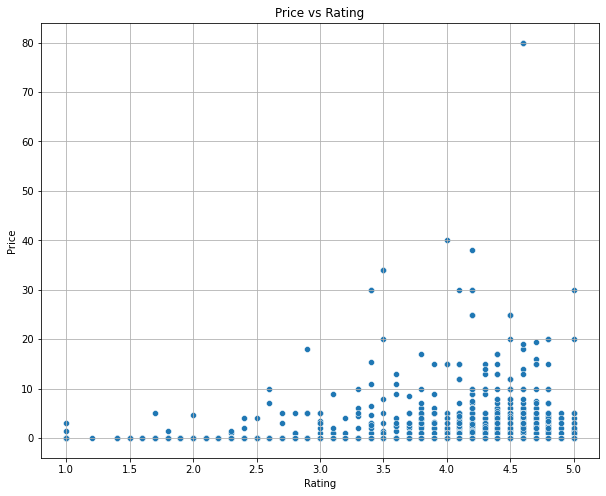

In [149]:
plt.subplots(figsize=(10,8))
sns.scatterplot(x,y2,data = dfnum)
plt.title('Price vs Rating')
plt.grid(linestyle='-')
plt.show()

In [ ]:
#No, 'Rating' does not seem to increase with 'Price'

# 7.2 Rating vs Size Scatter plot

In [ ]:
## 7.2 Make scatter plot/joinplot for Rating vs. Size

#Are heavier apps rated better?

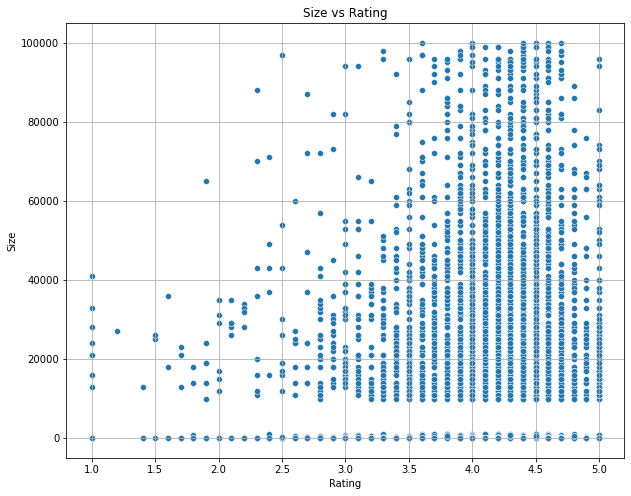

In [150]:
## scatter plot for 'Rating' and 'Size'

plt.subplots(figsize=(10,8))
sns.scatterplot(x,y3, data = dfnum)
plt.title('Size vs Rating')
plt.grid(linestyle='-')
plt.show()

In [ ]:
#It can be concluded from the plot that heavier Apps have more "Rating"

# 7.3 Rating vs Reviews scatter plot

In [ ]:
##7.3  Make scatter plot/joinplot for Rating vs. Reviews

# Does more review mean a better rating always?

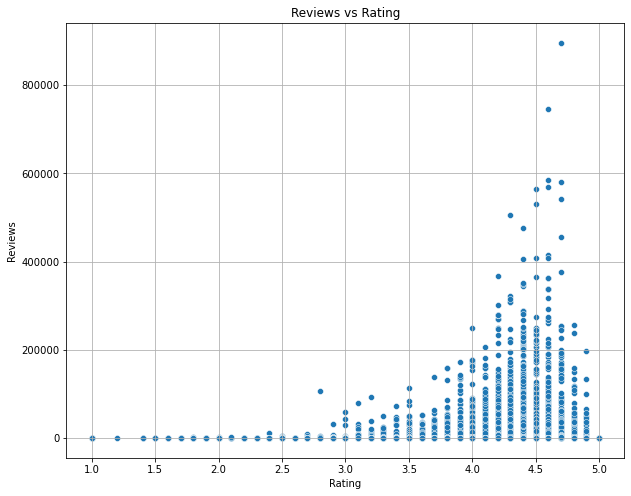

In [151]:
## scatter plot for "Rating" and 'Reviews'
plt.subplots(figsize=(10,8))
sns.scatterplot(x,y, data = dfnum)
plt.title('Reviews vs Rating')
plt.grid(linestyle='-')
plt.show()

In [ ]:
#yes, more Reviews show increment in Rating, but these can also be outliers.

In [152]:
## fitering all the object type columns as a new dataframe "dfobj"
dfobj = df1.select_dtypes(include = 'object')

In [153]:
dfobj.head()

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,Free,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


# 7.4 Rating vs Content Rating Boxplot

In [ ]:
## 7.4 Make boxplot for Rating vs. Content Rating

# Is there any difference in the ratings? Are some types liked better?

In [154]:
## Assigning numeric & object  columns to variables x , y and z... for ease of operation.
x  =  dfnum['Rating']
y  =  dfobj['Content Rating']
z  =  dfobj['Category']

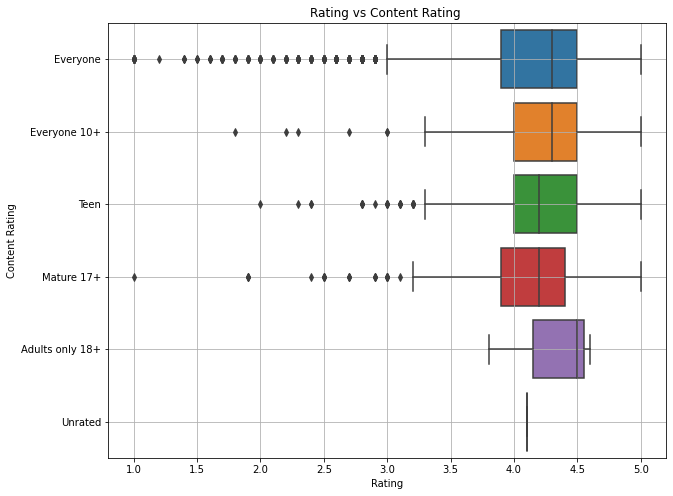

In [52]:
## plotting a boxplot for "Rating & Content Rating"
plt.subplots(figsize=(10,8))
sns.boxplot(x,y)
plt.title('Rating vs Content Rating ')
plt.grid(linestyle='-')
plt.show()

In [ ]:
#Not much conclusion could be drawn as the plot is almost same for Content Ratings, except Adults only 18+ & Unrated

# 7.5 Rating vs Category boxplot

In [ ]:
## 7.5 Make boxplot for Ratings vs. Category

# Which genre has the best ratings?

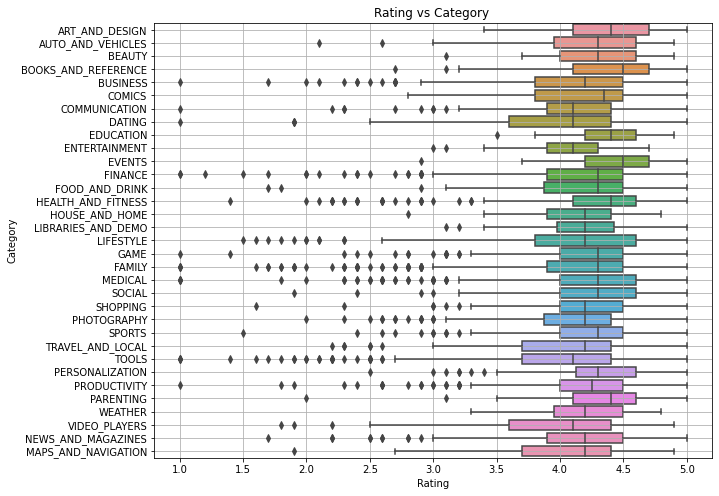

In [53]:
## plotting a boxplot for "Rating & Category"
plt.subplots(figsize=(10,8))
sns.boxplot(x,z)
plt.title('Rating vs Category ')
plt.grid(linestyle='-')
plt.show()

In [ ]:
"ART_AND_DESIGN and EVENT" genre has best "Rating"

# 8. Data preprocessing

In [ ]:
## 8. Data preprocessing
#For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

In [155]:
## making a copy of df as inp1
inp1= df
inp1.reset_index(drop=True,inplace=True)
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [ ]:
## 8.1 Reviews and Install have some values that are still relatively very high. Before building a linear regression model,

In [156]:
#you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

inp1['Installs'] = np.log1p(inp1['Installs'])
inp1['Reviews']  = np.log1p(inp1['Reviews'])

inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8.7,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2.8,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5.6,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [ ]:
## 8.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [157]:
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis = 1,inplace = True)

In [158]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8.7,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.3,6.875232,2.8,11.512935,Free,0.0,Everyone,Art & Design;Creativity
4,ART_AND_DESIGN,4.4,5.123964,5.6,10.819798,Free,0.0,Everyone,Art & Design


In [ ]:
## 8.3 Get dummy columns for Category, Genres, and Content Rating. 
#This needs to be done as the models do not understand categorical data, and all data should be numeric. 
#Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [160]:
inp2 = pd.get_dummies(inp1,columns=['Category', 'Genres', 'Content Rating','Type'],drop_first=True)
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated', 'Type_Paid'],
      dtype='object', length=152)

In [161]:
inp1.drop(['Category','Genres','Content Rating','Type'],axis = 1 ,inplace = True)
inp1.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,5.075174,19000.0,9.210440,0.0
1,3.9,6.875232,14000.0,13.122365,0.0
2,4.7,11.379520,8.7,15.424949,0.0
3,4.3,6.875232,2.8,11.512935,0.0
4,4.4,5.123964,5.6,10.819798,0.0


In [164]:
## joining the two dataframes inp1 and inp2 by .... "pd.concat()" method

frames = [inp1,inp2]
df = pd.concat(frames)


# 9. Train_ test_ split

In [8]:
## 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [170]:
# importing modelselection "train_test_split" from "sklearn"

from sklearn.model_selection import train_test_split

#Naming the new dataframes df_train and df_test.

df_train, df_test = train_test_split(df,test_size = 0.3,random_state = 100)

# 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [171]:
## 10. Separating the dataframes into X_train, y_train, X_test, and y_test.

X_train = df_train
Y_train = df_train.pop('Rating')

X_test = df_test
Y_test = df_test.pop('Rating')

# 11 . Model building

In [172]:
## 11.1 Using linear regression as the technique
# importing "Linear Regression" model from "sklearn"

from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train, Y_train)

LinearRegression()

In [173]:
from sklearn.metrics import r2_score

Y_train_predict = lin.predict(X_train)
r2_score(Y_train, Y_train_predict)

0.020774834290193223

# 12. Make predictions on test set and report R2.

In [174]:
## 12. Making predictions on test set and report R2.

X_test_precdict =lin.predict(X_test)
r2_score(Y_test,X_test_precdict)

0.01595648625119994